<a href="https://colab.research.google.com/github/nathsmo/Victimas_PNC_2017/blob/master/Procesamiento2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo Procesamiento de datos

* Segundo análisis creado a partir de una investigación personal después de la clase y entrega original del proyecto.

## Importar librerias

In [1]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.externals.six import StringIO  
from sklearn import metrics
import pandas as pd
import numpy as np  
import pydotplus
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score
from pandas import DataFrame
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import sklearn
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Importando CSV

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vic_final.csv to vic_final.csv


In [0]:
df = pd.read_csv('vic_final.csv')
df.drop(u'Unnamed: 0', axis=1, inplace=True)# irrelevante

## División de regiones de la data


* Reference for dividing the regions: https://aprende.guatemala.com/historia/geografia/regiones-de-guatemala/

### Departamentos segun código

| Codigo  | Departamento      |
|----|----------------|
| 1  | Guatemala      |
| 2  | El Progreso    |
| 3  | Sacatepéquez   |
| 4  | Chimaltenango  |
| 5  | Escuintla      |
| 6  | Santa Rosa     |
| 7  | Sololá         |
| 8  | Totonicapán    |
| 9  | Quetzaltenango |
| 10 | Suchitepéquez  |
| 11 | Retalhuleu     |
| 12 | San Marcos     |
| 13 | Huehuetenango  |
| 14 | Quiché         |
| 15 | Baja Verapaz   |
| 16 | Alta Verapaz   |
| 17 | Petén          |
| 18 | Izabal         |
| 19 | Zacapa         |
| 20 | Chiquimula     |
| 21 | Jalapa         |
| 22 | Jutiapa        |


In [0]:
metro = [1]
norte = [15, 16]
nor_or = [18, 19, 2, 20]
sur_or = [21, 22, 6]
central = [4, 3, 5]
sur_oc = [12, 11, 9, 8, 7, 10]
nor_oc = [13, 14]
peten = [17]

reg = []

In [0]:
for i in df['dept']:
    if i in metro:
        reg.append("metro")
    elif i in norte:
        reg.append("norte")
    elif i in nor_or:
        reg.append("nor_or")    
    elif i in sur_or:
        reg.append("sur_or")    
    elif i in central:
        reg.append("central") 
    elif i in sur_oc:
        reg.append("sur_oc")    
    elif i in nor_oc:
        reg.append("nor_oc")
    elif i in peten:
        reg.append("peten")

In [0]:
df['region'] = reg

In [7]:
df.head()

,mes,dia,dia_sem,hora,g_hora,area,dept,muni,sexo,edad,g_edad,mayor_menor,delito,g_delitos,region
0,1,1,7,3,1,2,1,115,1,22,5,1,69,4,metro
1,1,1,7,19,4,2,2,207,1,24,5,1,69,4,nor_or
2,1,2,1,8,2,2,19,1901,1,35,8,1,75,3,nor_or
3,1,2,1,18,4,1,5,501,1,27,6,1,75,3,central
4,1,2,1,12,3,2,10,1001,1,62,13,1,75,3,sur_oc


In [0]:
Region_Count_Table = df.region.value_counts()

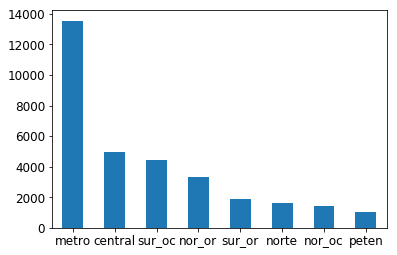

In [9]:
Region_Count_Table.plot.bar(x='lab', y='val', rot=0)

* There are probably more crimes reported in the City because there's more police presence there. Also it is easier to go and report a crime than in the outside. 
* It is interesting how the North Occidental and North region have almost the same crime.


In [0]:
ciudad = df.loc[df.dept ==1]

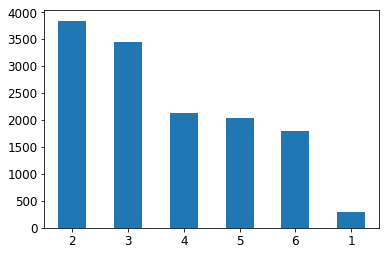

In [11]:
Ciudad_Count_Table = ciudad.g_delitos.value_counts()
Ciudad_Count_Table.plot.bar(x='lab', y='val', rot=0)

* The crime group are in order of less serious to fatal and worst.

[0] Detenciones

[1] Crímenes leves

[2] Lesiones 

[3] Hurto leve 

[4] Robo 

[5] Extorsión 

[6] Muerte  


In [12]:
df.head()

,mes,dia,dia_sem,hora,g_hora,area,dept,muni,sexo,edad,g_edad,mayor_menor,delito,g_delitos,region
0,1,1,7,3,1,2,1,115,1,22,5,1,69,4,metro
1,1,1,7,19,4,2,2,207,1,24,5,1,69,4,nor_or
2,1,2,1,8,2,2,19,1901,1,35,8,1,75,3,nor_or
3,1,2,1,18,4,1,5,501,1,27,6,1,75,3,central
4,1,2,1,12,3,2,10,1001,1,62,13,1,75,3,sur_oc


In [0]:
fraijanes = ciudad.loc[ciudad.muni ==113]

In [0]:
fraijanes.drop(['muni', 'dept', 'region'], axis=1)

In [0]:
Fraijanes_mes_Count_Table = fraijanes.mes.value_counts()
Fraijanes_dia_sem_Count_Table = fraijanes.dia_sem.value_counts()
Fraijanes_g_hora_Count_Table = fraijanes.g_hora.value_counts()
Fraijanes_area_Count_Table = fraijanes.area.value_counts()
Fraijanes_sexo_Count_Table = fraijanes.sexo.value_counts()
Fraijanes_g_edad_Count_Table = fraijanes.g_edad.value_counts()
Fraijanes_delito_Count_Table = fraijanes.delito.value_counts()

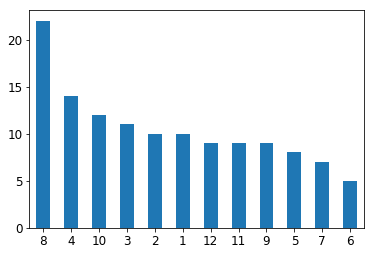

In [16]:
Fraijanes_mes_Count_Table.plot.bar(x='lab', y='val', rot=0)

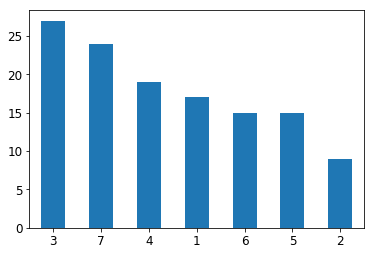

In [17]:
Fraijanes_dia_sem_Count_Table.plot.bar(x='lab', y='val', rot=0)


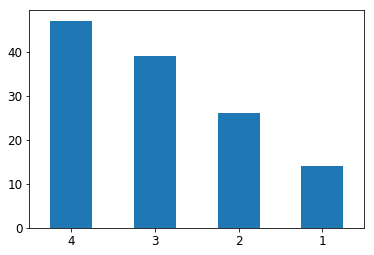

In [0]:
Fraijanes_g_hora_Count_Table.plot.bar(x='lab', y='val', rot=0)


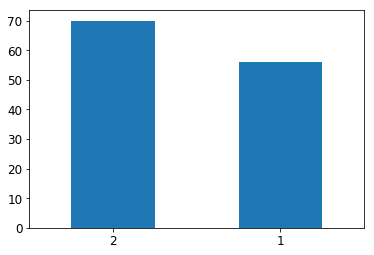

In [0]:
Fraijanes_area_Count_Table.plot.bar(x='lab', y='val', rot=0)


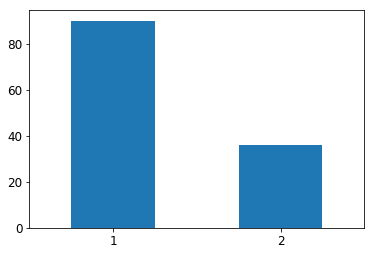

In [0]:
Fraijanes_sexo_Count_Table.plot.bar(x='lab', y='val', rot=0)


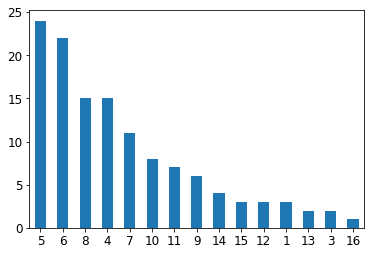

In [0]:
Fraijanes_g_edad_Count_Table.plot.bar(x='lab', y='val', rot=0)


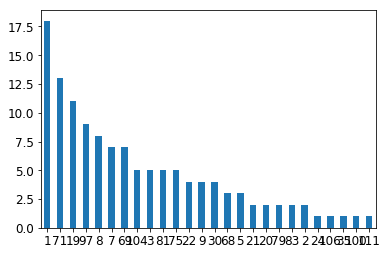

In [0]:
Fraijanes_delito_Count_Table.plot.bar(x='lab', y='val', rot=0)

In [18]:
del_com = Fraijanes_delito_Count_Table.reset_index(name='Delitos en Fraijanes')
del_com["Delito"] = ['Homicidio por arma de fuego', 'Desaparecido', 'Robo a residencias', 'Extorsion a comercios', 'Lesiones por armas blanca', 'Lesiones por arma de fuego',
                    'Robo de armas de fuego', 'Extorsion a residencias', 'Homicidio por arma contundente', 'Hurto a residencias',
                    'Hurto de armas de fuego', 'Robo de vehiculos', 'Lesiones por arma contundente', 'Robo a peatones', 'Otras causas (detenidos)', 'Homicidio por estrangulamiento', 'Hurto a comercios',
                    'Robo a comercios', 'Hurto de motocicletas', 'Hurto de vehiculos', 'Homicidio por arma blanca', 'Robo de motocicletas', 'Intento de suicidio por arma de fuego', 
                    'Robo en iglesias', 'Extorsion a transporte escolar', 'Suicidio por arma blanca']
del_com["Gravedad"] = ["HOMICIDIO","DESAPARICION","ROBO","EXTORSION","LESION","LESION","ROBO","EXTORSION","HOMICIDIO","HURTO","HURTO",'ROBO','LESION','ROBO','OTRO','HOMICIDIO','HURTO','ROBO','HURTO','HURTO','HOMICIDIO','ROBO','LESION','ROBO','EXTORSION','HOMICIDIO']
del_com

,index,Delitos en Fraijanes,Delito,Gravedad
0,1,18,Homicidio por arma de fuego,HOMICIDIO
1,71,13,Desaparecido,DESAPARICION
2,19,11,Robo a residencias,ROBO
3,97,9,Extorsion a comercios,EXTORSION
4,8,8,Lesiones por armas blanca,LESION
5,7,7,Lesiones por arma de fuego,LESION
6,69,7,Robo de armas de fuego,ROBO
7,104,5,Extorsion a residencias,EXTORSION
8,3,5,Homicidio por arma contundente,HOMICIDIO
9,81,5,Hurto a residencias,HURTO


In [19]:
crimenes_fraijanes = del_com['Delitos en Fraijanes'].sum()
crimenes_fraijanes

126

In [0]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    del_com['Delitos en Fraijanes'],
    # with the labels being officer names
    labels=df['Gravedad'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## Table for crime index

In [0]:
number = list(range(1,127))
number.remove(13)
number.remove(14)
number.remove(18)
number.remove(57)
number.remove(70)
number.remove(122)

In [0]:
delitos_descr = ["Homicidio por arma de fuego", "Homicidio por arma blanca", "Homicidio por arma contundente", "Homicidio por artefacto explosivo",
"Homicidio por estrangulamiento", "Homicidio por linchamiento", "Lesiones por arma de fuego", "Lesiones por arma blanca", "Lesiones por arma contundente", 
"Lesiones por artefacto explosivo", "Lesiones por linchamiento", "Agresión", "Secuestro", "Autosecuestro", "Allanamiento de morada", "Robo a residencias",
"Robo a comercios", "Hurto a comercios", "Robo de vehículos", "Robo de camiones/trailers con mercadería", "Robo de motocicletas", "Portación ilegal arma de fuego",
"Portación arma blanca", "Robo a bancos", "Robos a turistas extranjeros", "Robo a turistas nacionales", "Robo a peatones", "Robo a blindados", "Robo a buses urbanos",
"Robo a buses extraurbanos", "Cobro ilegal de impuesto a buses", "Robo en iglesias", "Otros robos y hurtos", "Impuesto a negocios", "En desalojos de fincas",
"En allanamientos judiciales", "Extorsión","Portación artefacto explosivo","Tenencia de droga","Tráfico de droga","Siembra y cultivo de drogas",
"Delitos forestales","Cohecho","Orden de captura","Riña","Daños","Ebriedad y escándalo","Escándalo bajo efectos de droga","Responsabilidad de conductores",
"Accidente de tránsito","Indocumentados extranjeros (remitidos)","Estafa","Perversión de menores","Contrabando","Disparos","Falsificación de documentos",
"Falsificación de moneda","Disturbios","Tenencia de licores clandestirnos","Rapto","Actos inmorales en la vía pública","Maltrato infantil","Juegos ilícitos",
"Otras causas (detenidos)","Robo de armas de fuego","Desaparecidos","Extravío de armas de fuego","Robo a microbuses extraurbanos","Robo a microbuses urbanos",
"Hurto de armas de fuego","Hurto a buses extraurbanos","Hurto a buses urbanos","Hurto a iglesias","Hurto de motocicletas","Hurto a peatones",
"Hurto a residencias","Hurto a turistas extranjeros","Hurto de vehículos","Violación","Robo a bus","Intento de suicidio por arma blanca",
"Suicidio por arma de fuego","Suicidio por asfixia","Suicidio por intoxicación de insecticida","Intento de suicidio por intoxicación de medicamentos",
"Suicidio por otras intoxicaciones","Suicidio por politraumatismo","Suicidio por intoxicación de envenenamiento","Extorsión a buses extraurbanos",
"Extorsión a buses urbanos","Extorsión a centro educativo","Extorsión a comercios","Extorsión a municipalidad","Extorsión a taxis","Extorsión a transporte escolar",
"Extorsión a transporte pesado","Extorsión a mototaxis","Extorsión a iglesias","Extorsión a residencias","Otras extorsiones","Intento de suicidio por arma de fuego",
"Intento de suicidio por asfixia","Intento de suicidio por intoxicación de insecticida","Intento de suicidio por otras intoxicaciones","Intento de suicidio por politraumatismo","Suicidio por arma blanca",
"Intento de suicidio por intoxiación de envenenamiento","Suicidio por intoxicación de medicamentos","Extorsión a instituciones","Hurto a bancos",
"Suicidio por causa ignorada","Intento de suicidio por quemadura","Armas incautadas","Intento de suicidio por intoxicación alcohólica","Suicidio por intoxicación alcohólica",
"Intento de suicidio por causa ignorada","Intento de suicidio por arma contundente","Motos recuperadas","Vehículos recuperados","Lesiones por vapuleo"]

In [0]:
data = {'index':number, 'Delitos':delitos_descr} 

# Create DataFrame 
descrip = pd.DataFrame(data)
del_coms = pd.DataFrame(del_com)

In [0]:
df_outer = pd.merge(del_com, descrip, on='index', how='outer')

In [56]:
df_outer.dropna()

,index,Delitos en Mixco,Delitos
0,7,264.0,Lesiones por arma de fuego
1,97,219.0,Extorsión a comercios
2,71,203.0,Desaparecidos
3,1,187.0,Homicidio por arma de fuego
4,83,156.0,Hurto de vehículos
5,104,142.0,Extorsión a residencias
6,79,102.0,Hurto de motocicletas
7,24,83.0,Robo de motocicletas
8,8,66.0,Lesiones por arma blanca
9,68,55.0,Otras causas (detenidos)


In [24]:
mixco = ciudad.loc[ciudad.muni ==108]
mixco_delito_Count_Table = mixco.delito.value_counts()
del_com = mixco_delito_Count_Table.reset_index(name='Delitos en Mixco')
del_com

,index,Delitos en Mixco
0,7,264
1,97,219
2,71,203
3,1,187
4,83,156
5,104,142
6,79,102
7,24,83
8,8,66
9,68,55


In [0]:
del_com["Delito"] = ['Homicidio por arma de fuego', 'Desaparecido', 'Robo a residencias', 'Extorsion a comercios', 'Lesiones por armas blanca', 'Lesiones por arma de fuego',
                    'Robo de armas de fuego', 'Extorsion a residencias', 'Homicidio por arma contundente', 'Hurto a residencias',
                    'Hurto de armas de fuego', 'Robo de vehiculos', 'Lesiones por arma contundente', 'Robo a peatones', 'Otras causas (detenidos)', 'Homicidio por estrangulamiento', 'Hurto a comercios',
                    'Robo a comercios', 'Hurto de motocicletas', 'Hurto de vehiculos', 'Homicidio por arma blanca', 'Robo de motocicletas', 'Intento de suicidio por arma de fuego', 
                    'Robo en iglesias', 'Extorsion a transporte escolar', 'Suicidio por arma blanca']
del_com["Gravedad"] = ["HOMICIDIO","DESAPARICION","ROBO","EXTORSION","LESION","LESION","ROBO","EXTORSION","HOMICIDIO","HURTO","HURTO",'ROBO','LESION','ROBO','OTRO','HOMICIDIO','HURTO','ROBO','HURTO','HURTO','HOMICIDIO','ROBO','LESION','ROBO','EXTORSION','HOMICIDIO']
del_com